## DANA 2021
## Stock to flow and macroeconomic indicators for the Bitcoin price

### Ignacio

### 1. Introduction
#### 1.a) Scarcity in Bitcoin
Scarcity is a feature in assets that make its value time-resistant.

In [1]:
## fetch the Bitcoin Bitstamp price data
#api.dataset

In [2]:
## import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_theme()

In [3]:
from datetime import datetime, timedelta

In [4]:
## set plotting paramenters as default for the rest of the notebook
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

In [5]:
## query blockchain values
data0 = pd.read_csv("BTC-USD (1).csv")
data0.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-24,420.955994,425.549988,413.907013,424.954987,424.954987,67743696.0
1,2016-02-25,425.036987,427.718994,420.415009,424.544006,424.544006,70798000.0
2,2016-02-26,424.628998,432.152008,421.619995,432.152008,432.152008,61486000.0
3,2016-02-27,432.838989,434.230988,428.102997,432.519012,432.519012,41893600.0
4,2016-02-28,432.571014,435.683014,423.820007,433.503998,433.503998,53033400.0


In [6]:
## load bitstamp data
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
data["Date"] = [datetime.utcfromtimestamp(int(ttt)) for ttt in data["Timestamp"]]
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30 23:56:00
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30 23:57:00
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30 23:58:00
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30 23:59:00
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020-12-31 00:00:00


In [7]:
## collect daily or motnhly data
## data

def _daily_(x, cc="Date"):
    idx = []
    n, m = np.shape(x)  ## data dimensions
    for iidd, xi in enumerate(x[cc]):
        if (xi. hour == 0) and (xi.minute == 0) and (xi.second == 0):
            idx.append(iidd)
            
    df = x.iloc[idx]
    return df.reset_index().drop("index", axis=1)

## Calculate MAdata

In [8]:
Xday0 = _daily_(data)

In [9]:
## merge daily datasets
for ni, i in enumerate(data0["Date"]):
    if str(i) == str(Xday0["Date"][Xday0["Date"].index[-1]])[0:10]:
        idx_merge = i
        break

        
## change column name
Xday0.rename(columns={"Volume_(Currency)":"Volume"}, inplace = True)
a1 = Xday0[["Date", "Open", "High", "Low", "Close", "Volume"]]
a2 = data0.iloc[range(ni+1, data0.index[-1]+1)][["Date", "Open", "High", "Low", "Close", "Volume"]]

Xday = pd.concat([a1, a2])
Xday = Xday.reset_index().drop("index", axis=1)

## Pi cycle
We compute the $\pi$-cycle based on a long and short moving averages (MAs). The condition for the choice of the daily range for the MAs a one combination which ratio approximates to $\pi$, this is

\begin{align*}
\frac{\text{MA}^*_{\text{long}}}{\text{MA}_{\text{short}}} = \frac{\text{MA}^*(x, \tau=350)}{\text{MA}(x, \tau=111)} \approx \pi \\
\text{MA}(x, \tau) = \left(\text{MA}_1(x_1, \tau),\; \text{MA}_2(x_2, \tau),\; \ldots,\; \text{MA}_n(x_n, \tau) \right)
\end{align*}

where $\text{MA}$ is the simple moving average function for the price $x$ and price lag $\tau$. The MA at the $i$-th time point is computed as

\begin{align*}
\text{MA}_i(x, \tau) = \frac{1}{\tau}\sum_{k=-\tau}^{i}x_i
\end{align*}

In [10]:
## calcuate pi cycle 350
def pi_cycle(dat, cc="Close"):
    x = dat[cc]
    lng = 350
    srt = 111
    
    L, S = [np.NaN]*lng, [np.NaN]*srt
    
    ## calculate short and long cycles
    for ll in range(len(x[lng:])):
        li = np.sum(x[ll:ll+lng])
        L.append(li)
        
    for ss in range(len(x[srt:])):
        si = np.sum(x[ss:ss+srt])
        S.append(si)
    
    return np.array(L)*2/lng, np.array(S)/srt

In [11]:
## compute daily pi cylce 350
L, S = pi_cycle(Xday)
Xday["Long_Pi"] = L
Xday["Short_Pi"] = S

In [12]:
## save as csv
#Xday.to_csv("Xday.csv")

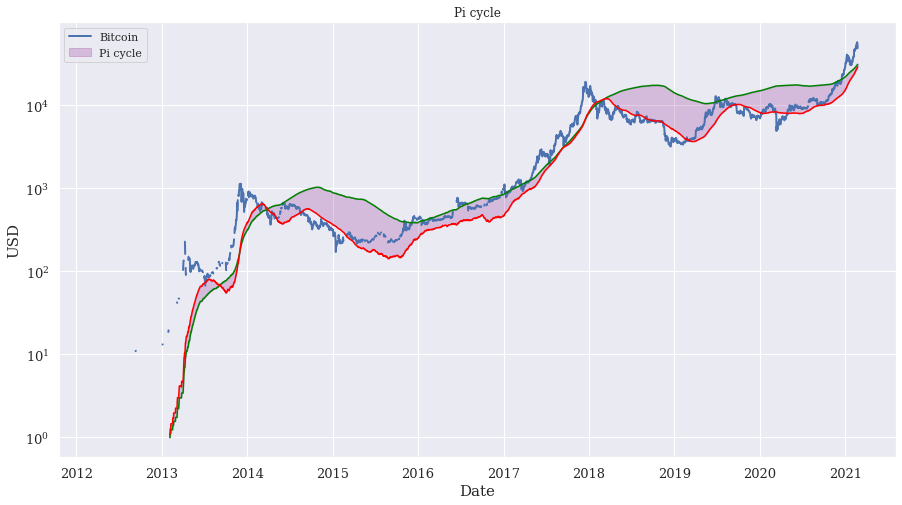

In [13]:
## seaborn plot
i0 = 0
f0 = -1

fig1, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=Xday[i0:f0], y="Close", x="Date", label="Bitcoin", lw=2)
sns.lineplot(data=Xday[i0+400:f0], y="Long_Pi", x="Date", color="green")
sns.lineplot(data=Xday[i0+400:f0], y="Short_Pi", x="Date", color="red")
plt.fill_between(Xday["Date"][i0+400:f0], Xday["Long_Pi"][i0+400:f0], Xday["Short_Pi"][i0+400:f0], color="purple", alpha=0.2, label="Pi cycle")
ax.set(yscale="log", ylabel="USD")
ax.set_title("Pi cycle")
ax.legend()

##plt.savefig("Fig01.png", dpi=300)

In [14]:
## calculate price percentage-change
def price_percentage_change(x, O="Open", C="Close"):
    xOpen = np.array(x[O])
    xClose = np.array(x[C])
    return (xClose/xOpen - 1)

In [15]:
Xday["Percentage"] = price_percentage_change(Xday)

In [16]:
## price velocity and acceleration

def _dynamics_(dat, cc="Percentage"):
    xi = dat[cc]
    v = [np.nan]
    a = [np.nan]
    
    v += list(np.diff(xi))
    a += list(np.diff(v))
    
    return np.array(v), np.array(a)

In [17]:
## compute velocity and acceleration
v, a = _dynamics_(Xday)
Xday["Velocity"] = v
Xday["Acceleration"] = a

## magnitude
Xday["V2"] = v*v
Xday["A2"] = a*a

In [18]:
Xday.tail()

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10,30325.623534,27822.559626,0.003797,-0.077714,-0.168070,0.006039,0.028247
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10,30593.873131,28204.189621,0.026242,0.022446,0.100160,0.000504,0.010032
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10,30871.890019,28598.433543,-0.057800,-0.084043,-0.106489,0.007063,0.011340
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11,31135.661278,28964.431384,-0.099262,-0.041462,0.042581,0.001719,0.001813
3338,2021-02-24,50940.621094,51225.078125,47254.687500,50562.074219,7.704690e+10,31369.280225,29277.752157,-0.007431,0.091831,0.133293,0.008433,0.017767


Text(0.5, 1.0, 'Velocity')

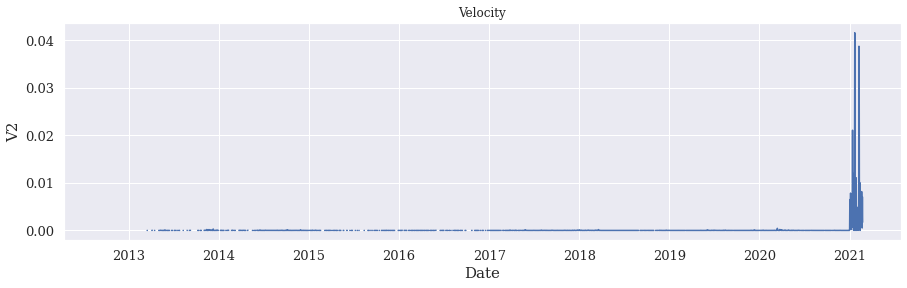

In [19]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="V2", x="Date")
ax.set_title("Velocity")

Text(0.5, 1.0, 'Acceleration')

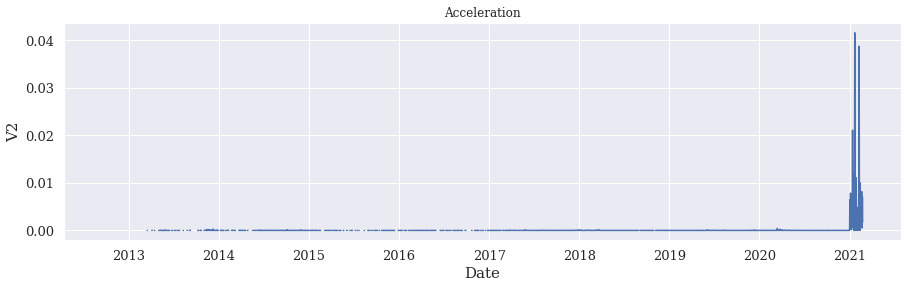

In [20]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="V2", x="Date")
ax.set_title("Acceleration")

Text(0.5, 1.0, 'Price percentage change')

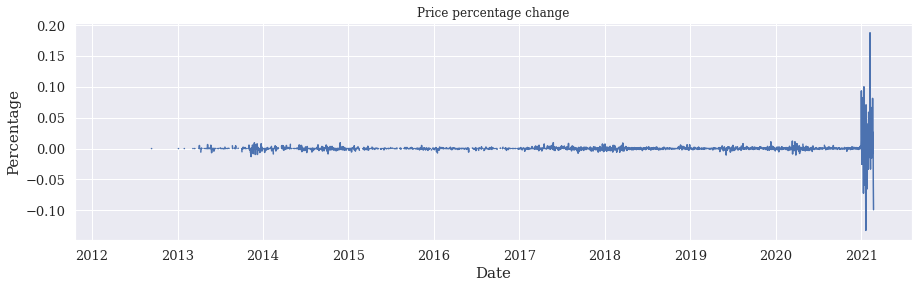

In [21]:
## plot percentage
i0 = 0
f0 = -1

fig3, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="Percentage", x="Date")
ax.set_title("Price percentage change")

## S&P500

In [22]:
## load s&p500
SP = pd.read_csv("SP500.csv")

## convert time to same format of Bitcoin data
SP["Date"] = [datetime.strptime(dte+" 00:00:00", '%Y-%m-%d %H:%M:%S') for dte in SP["Date"]]
SP.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5164,2020-07-14,3141.110107,3200.949951,3127.659912,3197.520020,3197.520020,4476170000
5165,2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4669760000
5166,2020-07-16,3208.360107,3220.389893,3198.590088,3215.570068,3215.570068,3961230000
5167,2020-07-17,3224.209961,3233.520020,3205.649902,3224.729980,3224.729980,3993830000
5168,2020-07-20,3224.290039,3258.610107,3215.159912,3251.840088,3251.840088,3971200000


In [23]:
SP["Date"][3019]

Timestamp('2012-01-03 00:00:00')

In [24]:
## nan padder
def pad_nan(x, cc=["0"]):
    xd = x["Date"]
    BTC = Xday["Date"]
    t0 = list(BTC.index)[0]
    tf = list(BTC.index)[-1]
    #df = pd.DataFrame(np.nan, index=list(range(t0, tf)), columns=cc)
    idx = []
    
    for i in range(len(BTC)):
        try:
            iid = x["Close"][xd == BTC[i]].index[0]
            val = x["Close"].iloc[[iid]]
            idx.append(float(val))
        except:
            idx.append(np.nan)
            
    #price = x["Close"].iloc[[idx]]
    return idx#pd.DataFrame(price, columns=cc)

In [25]:
Xday["SP500"] = pad_nan(SP, cc=["SP500"])
Xday.tail()

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2,SP500
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10,30325.623534,27822.559626,0.003797,-0.077714,-0.168070,0.006039,0.028247,NaN
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10,30593.873131,28204.189621,0.026242,0.022446,0.100160,0.000504,0.010032,NaN
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10,30871.890019,28598.433543,-0.057800,-0.084043,-0.106489,0.007063,0.011340,NaN
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11,31135.661278,28964.431384,-0.099262,-0.041462,0.042581,0.001719,0.001813,NaN
3338,2021-02-24,50940.621094,51225.078125,47254.687500,50562.074219,7.704690e+10,31369.280225,29277.752157,-0.007431,0.091831,0.133293,0.008433,0.017767,NaN


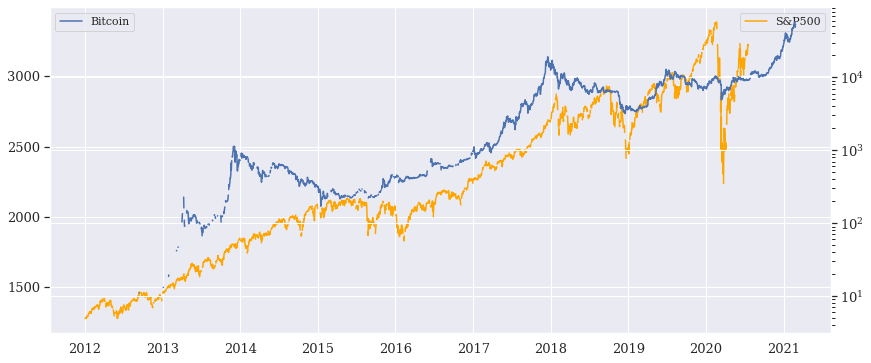

In [26]:
fig_sp, ax1 = plt.subplots(figsize=(14,6))
#sns.lineplot(data=Xday, x="Date", y="SP500", label="S\&P500")
ax1.plot(Xday["Date"], Xday["SP500"], label=r"S&P500", color="orange")

ax2 = ax1.twinx()
ax2.plot(Xday["Date"], Xday["Close"], label="Bitcoin")
ax2.set_yscale("log")

ax1.legend()
ax2.legend()

## Stock-to-Flow
Genesis block produced in "2009-3-1" and thereafter there is a halving event every four years where the amount of Bitcoins being mined is cut by one half its previous cycle.

Bitcoin maximum supply is 21 million and there is no chance in extracting more.

The last Bitoin will be mined in "2140"

In [27]:
## dates of genesis and last block
base0 = datetime.strptime("2009-1-3 00:00:00", '%Y-%m-%d %H:%M:%S')
baseF = datetime.strptime("2140-1-3 00:00:00", '%Y-%m-%d %H:%M:%S')

## halving dates 
halv0 = datetime.strptime("2012-11-28 00:00:00", '%Y-%m-%d %H:%M:%S')
halv1 = datetime.strptime("2016-7-9 00:00:00", '%Y-%m-%d %H:%M:%S')
halv2 = datetime.strptime("2020-5-15 00:00:00", '%Y-%m-%d %H:%M:%S')

mhalv = [(halv0 - base0).days, (halv1 - halv0).days, (halv2 - halv1).days]
mhalv = int(round(np.mean(mhalv), 0))  ## mean halving time in days


## create date variable from genesis block to last bitcon creation
s2f_time = [base0]

i = 0
ddd = False
next0 = base0

while ddd == False:
    if (next0 != baseF):
        i += 1
        next0 = base0 + timedelta(days=i)
        s2f_time.append(next0)
    else:
        ddd = True


## compute Bitcoins per block
Bpb = 50 ## Bitcoins-per-block mined pre-halving era
BTCp = [] ## Bitcoins produced
min_in_day = 6*24 ## number of 10-minutes in a day
ref_day = base0 ## reference day
hlv = halv0

for b in range(len(s2f_time)):
    ref_day = base0 + timedelta(days=b)
    if (ref_day == hlv):
        Bpb = Bpb/2  ## decrease by one-half
        hlv = hlv + timedelta(days=mhalv)
    BTCp.append(min_in_day*Bpb)

## Bitcoins in stock
BTCstock = np.cumsum(BTCp)

## convert to dataframe
BTCs = pd.DataFrame({"Date": s2f_time, "BTC_mined": BTCp, "BTC_stock": BTCstock})

[None]

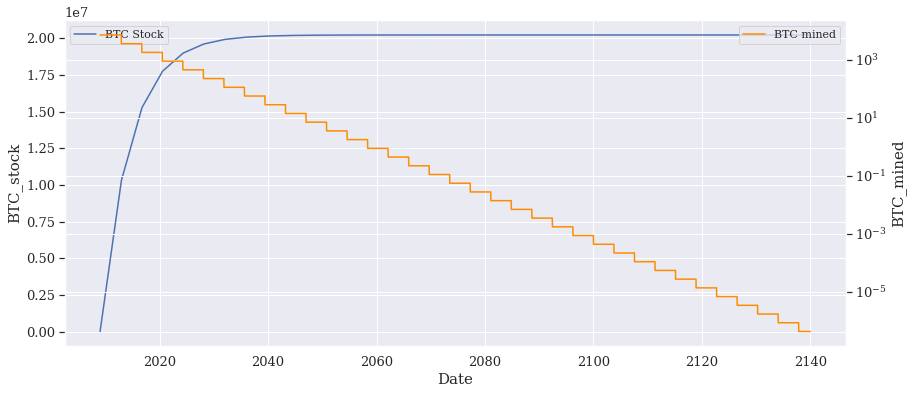

In [28]:
## Bitcoins mined and Bitcoins in stock
fig0, ax1 = plt.subplots(figsize=(14,6))
sns.lineplot(data=BTCs, x="Date", y="BTC_stock", label="BTC Stock")

ax2 = ax1.twinx()
sns.lineplot(data=BTCs, x="Date", y="BTC_mined", label="BTC mined", color="darkorange")
ax2.set(yscale="log")

### Calculation of the S2F model
To compute the Stock-to-Flow for Bitcoin we make use of the simple ratio of the Stock of the asset circulating in the market and the supply

\begin{align*}
\text{SF} = \frac{\text{stock}}{\text{flow}}
\end{align*}

In [29]:
## Stock-toFlow
BTCs["S2F"] = BTCs["BTC_stock"]/BTCs["BTC_mined"]
BTCs.tail()

,Date,BTC_mined,BTC_stock,S2F
47842,2139-12-30,4.190952e-07,2.021760e+07,4.824107e+13
47843,2139-12-31,4.190952e-07,2.021760e+07,4.824107e+13
47844,2140-01-01,4.190952e-07,2.021760e+07,4.824107e+13
47845,2140-01-02,4.190952e-07,2.021760e+07,4.824107e+13
47846,2140-01-03,4.190952e-07,2.021760e+07,4.824107e+13


[None]

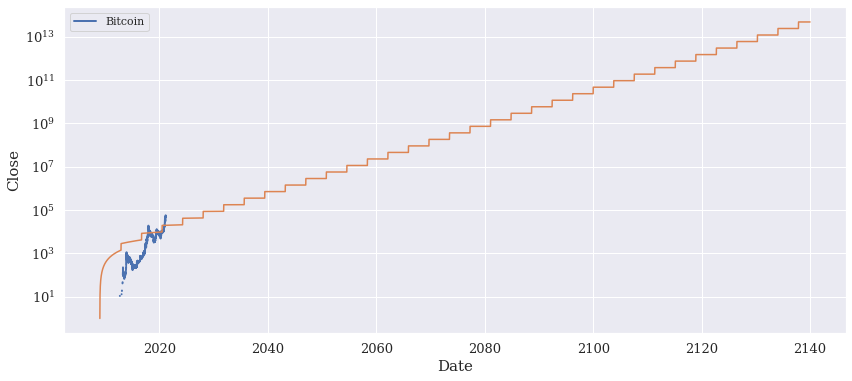

In [30]:
## S2F
fig4, ax1 = plt.subplots(figsize=(14,6))
sns.lineplot(data=Xday[i0:f0], y="Close", x="Date", label="Bitcoin", lw=2)
sns.lineplot(data=BTCs, x="Date", y="S2F")
ax1.set(yscale="log")